#####kaggle https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting


Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [47]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
train_data.shape

(1460, 81)

In [49]:
train_data['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [50]:
train_data['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [51]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
train_data.isnull().any()  

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [54]:
nan_cols = [i for i in train_data.columns if train_data[i].isnull().any()]

In [55]:
nan_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [56]:
train_data['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [57]:
train_data['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [58]:
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')

In [59]:
train_data['PoolQC'].head()

0    NA
1    NA
2    NA
3    NA
4    NA
Name: PoolQC, dtype: object

In [60]:
train_data['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [61]:
train_data['Alley'] = train_data['Alley'].fillna('NA')

In [62]:
train_data['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [63]:
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')

In [64]:
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')

In [65]:
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')

In [66]:
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')

In [67]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')

In [70]:
train_data['GarageType'] = train_data['GarageType'].fillna('NA')

In [71]:
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
train_data['Fence'] = train_data['Fence'].fillna('NA')
train_data['MiscFeature'] = train_data['MiscFeature'].fillna('NA')

In [72]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mode()[0],inplace = True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0],inplace = True)
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0],inplace = True)
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0],inplace = True)
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace = True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0],inplace = True)

In [73]:
nan_cols_new = [i for i in train_data.columns if train_data[i].isnull().any()]

In [74]:
nan_cols_new

[]

In [75]:
train_data.isnull().sum().any()

False

In [76]:
train_data.shape

(1460, 81)

In [77]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [78]:
filter_col = [col for col in train_data if col.startswith('Yr')]
filter_col

['YrSold']

In [79]:
train_data['YrSold_build'] = 2021 - train_data['YrSold']

In [80]:
train_data.drop(['YrSold'],axis=1,inplace = True)

In [81]:
########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YrSold_build
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Normal,208500,13
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,WD,Normal,181500,14
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,WD,Normal,223500,13
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Abnorml,140000,15
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,WD,Normal,250000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,WD,Normal,175000,14
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,WD,Normal,210000,11
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,WD,Normal,266500,11
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,WD,Normal,142125,11


C:\Users\Chaitanya Mhetre\AppData\Local\Temp\ipykernel_36080\872861302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

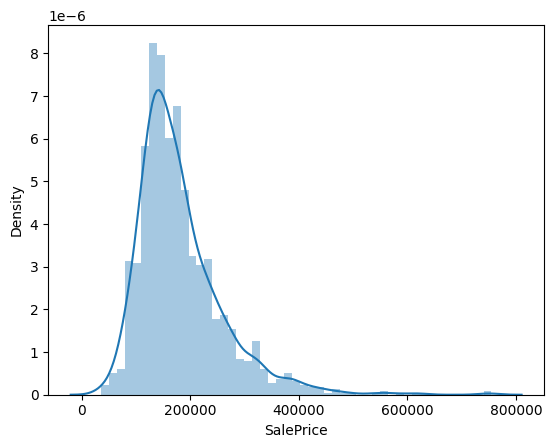

In [82]:
sns.distplot(train_data['SalePrice'])

In [83]:
train_data  = pd.get_dummies(train_data,drop_first=True)

In [84]:
train_data.shape

(1460, 259)

In [85]:
train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [86]:
train_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

train_data['YearBuilt_build'] = 2021 - train_data['YearBuilt']
train_data.drop(['YearBuilt'],axis=1,inplace = True)
train_data['YearRemodAdd_build'] = 2021 - train_data['YearRemodAdd']
train_data.drop(['YearRemodAdd'],axis=1,inplace = True)


In [87]:
train_data.shape

(1460, 259)

In [88]:
train_data['YearBuilt_build'] = 2021 - train_data['YearBuilt']
train_data.drop(['YearBuilt'],axis=1,inplace = True)
train_data['YearRemodAdd_build'] = 2021 - train_data['YearRemodAdd']
train_data.drop(['YearRemodAdd'],axis=1,inplace = True)

In [89]:
train_data.shape

(1460, 259)

In [90]:
########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.85)

{'BsmtFinType1_NA',
 'BsmtFinType2_NA',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_NA',
 'GarageArea',
 'GarageCond_NA',
 'GarageFinish_NA',
 'GarageQual_NA',
 'MiscFeature_Shed',
 'Neighborhood_Somerst',
 'PoolQC_NA',
 'RoofStyle_Hip',
 'SaleCondition_Partial'}

In [91]:
train_data = train_data.drop(['BsmtFinType1_NA',
 'BsmtFinType2_NA',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_NA',
 'GarageArea',
 'GarageCond_NA',
 'GarageFinish_NA',
 'GarageQual_NA',
 'MiscFeature_Shed',
 'Neighborhood_Somerst',
 'PoolQC_NA',
 'RoofStyle_Hip',
 'SaleCondition_Partial'],axis=1)

# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = train_data.drop(['Id','SalePrice'],axis =1)
y = train_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lm.fit(X_train,y_train)
pred = lm.predict(X_test)
print("test data Score:",lm.score(X_test,y_test))
print("train data Score:" , lm.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

test data Score: 0.7532774808500353
train data Score: 0.935262704617283
r2 sqyuare value 0.7532774808500353
MAE: 20125.300426172576
MSE: 1721652871.563597
RMSE: 41492.80505778799


# Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)

print("test data Score:", rf.score(X_test,y_test))
print("train data Score:" , rf.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, rf_y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred)))

test data Score: 0.8995305488473037
train data Score: 0.9768209684953977
r2 sqyuare value 0.8995305488473037
MAE: 16856.02666666667
MSE: 701085250.2536265
RMSE: 26478.014469624162
